In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, \
    fowlkes_mallows_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
# Download data
# !wget "https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/refs/heads/main/data/Skyserver_SQL2_27_2018 6_51_39 PM.csv"


--2024-11-16 17:01:02--  https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/refs/heads/main/data/Skyserver_SQL2_27_2018%206_51_39%20PM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1377602 (1.3M) [text/plain]
Saving to: ‘Skyserver_SQL2_27_2018 6_51_39 PM.csv’

Skyserver_SQL2_27_2 100%[===================>]   1.31M  --.-KB/s    in 0.1s    

2024-11-16 17:01:03 (13.0 MB/s) - ‘Skyserver_SQL2_27_2018 6_51_39 PM.csv’ saved [1377602/1377602]



### 1.1

In [5]:
df = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.to_csv(path_or_buf='skyserver_df.csv', index=False)

### 1.2

In [6]:
df.head(2)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


objid, specobjid, run, rerun, camcol, field, plate, mjd, and fiberid should all be okay to be omitted from the analysis

In [99]:
to_drop = ['objid','specobjid','run','rerun','camcol','field','plate','mjd','fiberid']
print(df[to_drop].describe())

              objid     specobjid           run    rerun        camcol  \
count  1.000000e+04  1.000000e+04  10000.000000  10000.0  10000.000000   
mean   1.237650e+18  1.645022e+18    981.034800    301.0      3.648700   
std    0.000000e+00  2.013998e+18    273.305024      0.0      1.666183   
min    1.237650e+18  2.995780e+17    308.000000    301.0      1.000000   
25%    1.237650e+18  3.389248e+17    752.000000    301.0      2.000000   
50%    1.237650e+18  4.966580e+17    756.000000    301.0      4.000000   
75%    1.237650e+18  2.881300e+18   1331.000000    301.0      5.000000   
max    1.237650e+18  9.468830e+18   1412.000000    301.0      6.000000   

              field         plate           mjd       fiberid  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean     302.380100   1460.986400  52943.533300    353.069400  
std      162.577763   1788.778371   1511.150651    206.298149  
min       11.000000    266.000000  51578.000000      1.000000  
25%      184.

In [100]:
print(df[to_drop].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   specobjid  10000 non-null  float64
 2   run        10000 non-null  int64  
 3   rerun      10000 non-null  int64  
 4   camcol     10000 non-null  int64  
 5   field      10000 non-null  int64  
 6   plate      10000 non-null  int64  
 7   mjd        10000 non-null  int64  
 8   fiberid    10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.3 KB
None


In [101]:
df_clean = df.drop(columns=to_drop)
df_clean

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590
...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,GALAXY,0.027583
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,GALAXY,0.117772
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,STAR,-0.000402
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,GALAXY,0.014019


In [102]:
#count objects
df_clean.value_counts(subset='class')

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

In [103]:
#encode class labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_clean['class'])

df_ready = df_clean.drop(columns=['class']).copy()
df_ready['Class'] = le.transform(df_clean['class'])

print([0,1,2])
print(le.classes_)

[0, 1, 2]
['GALAXY' 'QSO' 'STAR']


In [104]:
df_ready

,ra,dec,u,g,r,i,z,redshift,Class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,2
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,2
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,0
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,2
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,2
...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,0.027583,0
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,0.117772,0
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,-0.000402,2
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,0.014019,0


#### 1.3

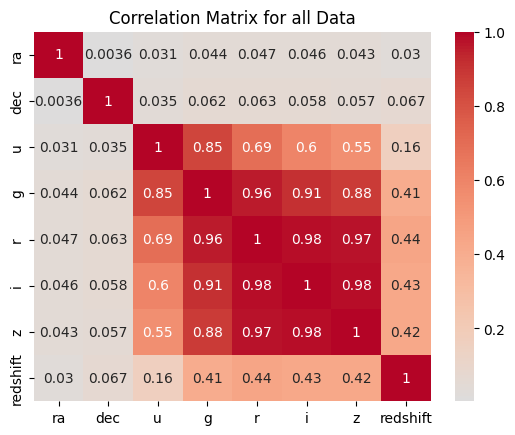

In [105]:
sns.heatmap(df_ready.drop(columns=['Class']).corr(), cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Matrix for all Data');

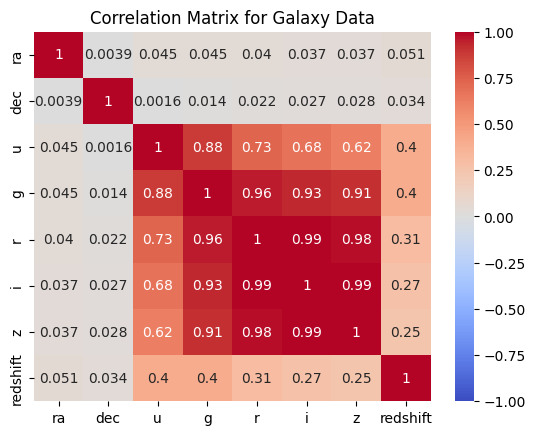

In [106]:
#GALAXY
gal = df_ready.query('Class == 0')

sns.heatmap(gal.drop(columns=['Class']).corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix for Galaxy Data');

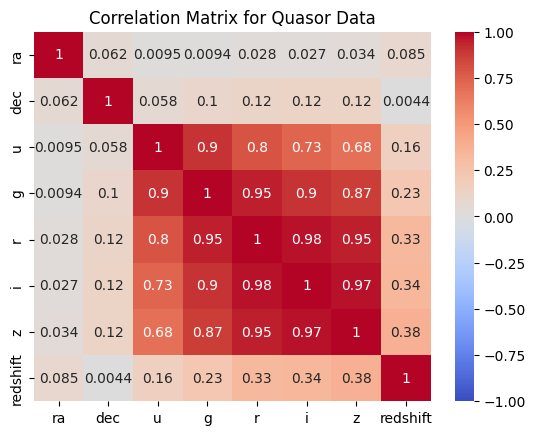

In [107]:
#QSO
qso = df_ready.query('Class == 1')

sns.heatmap(qso.drop(columns=['Class']).corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix for Quasor Data');

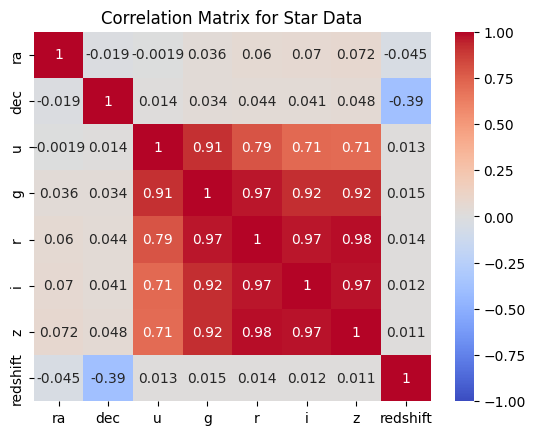

In [108]:
#STAR
sta = df_ready.query('Class == 2')

sns.heatmap(sta.drop(columns=['Class']).corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix for Star Data');

There appears to be some separation among the classes relative to correlation with redshift. For stars, none of the other variables seem to be related to redshift. For quasors, z and redshift data seem pretty correlated, while for galaxy data, u,g, and redshift data all seem more related than for the other classes. With that said, there appears to be minimum separation between the classes using these parameters.

#### 1.5

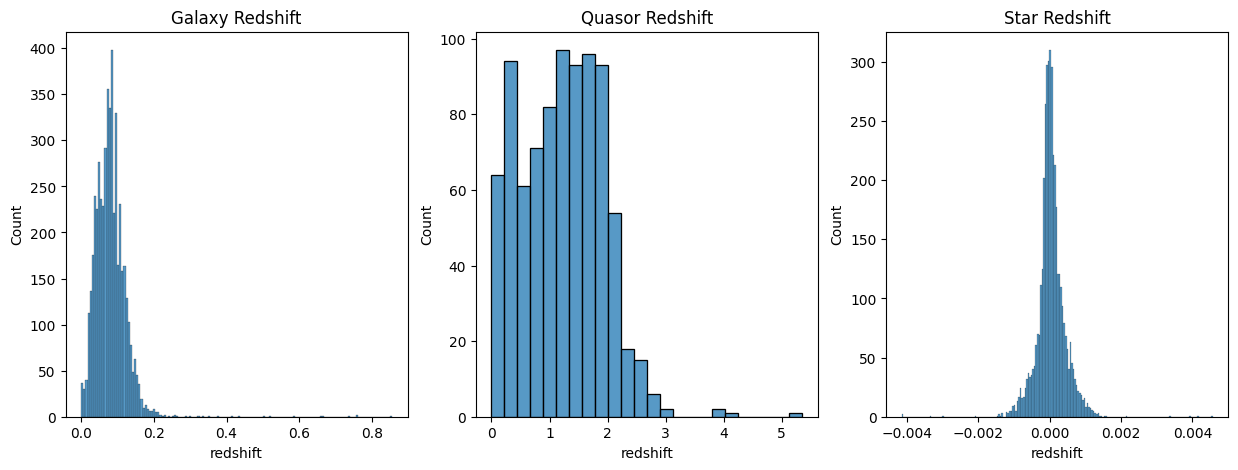

In [109]:
#redshift distributions
fig, [ax1,ax2,ax3] = plt.subplots(ncols=3)
fig.set_size_inches(15,5)

sns.histplot(gal.redshift, ax=ax1)
ax1.set_title('Galaxy Redshift')

sns.histplot(qso.redshift, ax=ax2)
ax2.set_title('Quasor Redshift')

sns.histplot(sta.redshift, ax=ax3)
ax3.set_title('Star Redshift');

The distributions of redshift for each class is different. Quasor's distribution is the most different, exclusively positive and roughly concentrated between 0 and 2. Galaxy's is also positive, but is a more normal distribution centered at ~0.1 redshift. Star's distribution is normal, and concentrated at 0 redshift, unique in that it has some negative values.

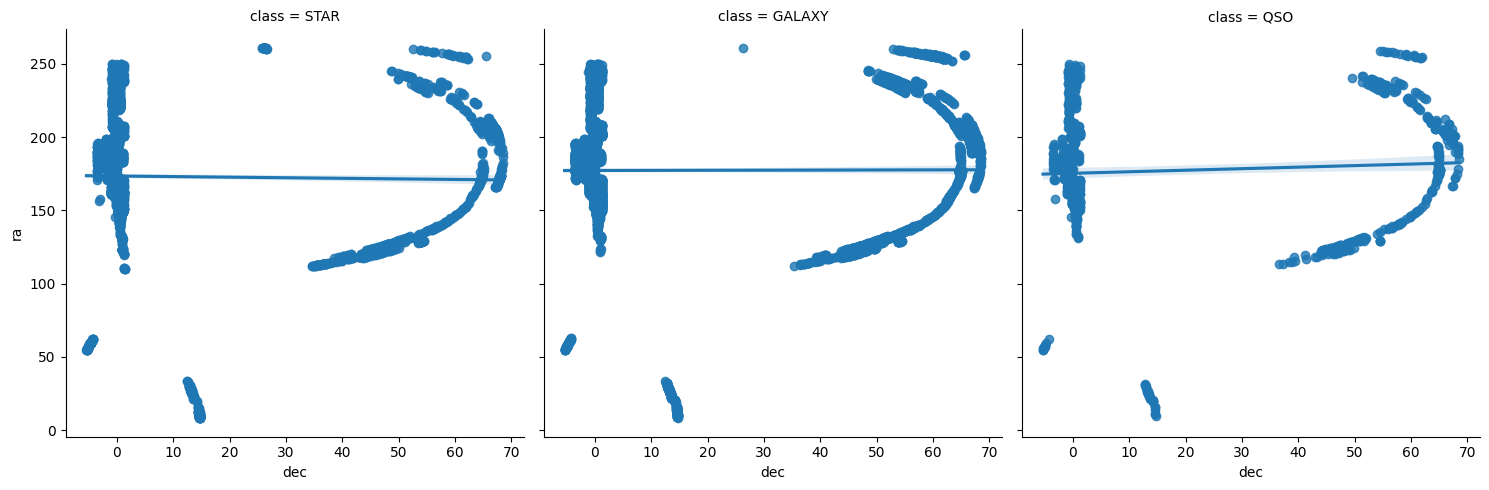

In [114]:
#right ascension vs declination plots by class
sns.lmplot(data=df, x='dec', y='ra', col='class');

These distributions seem very similar for all three classes. As expected from the correlation matrices, the Star class has a slight negative relationship with declination, but it is very slight.

##### Plot histograms for all filters

Galaxies


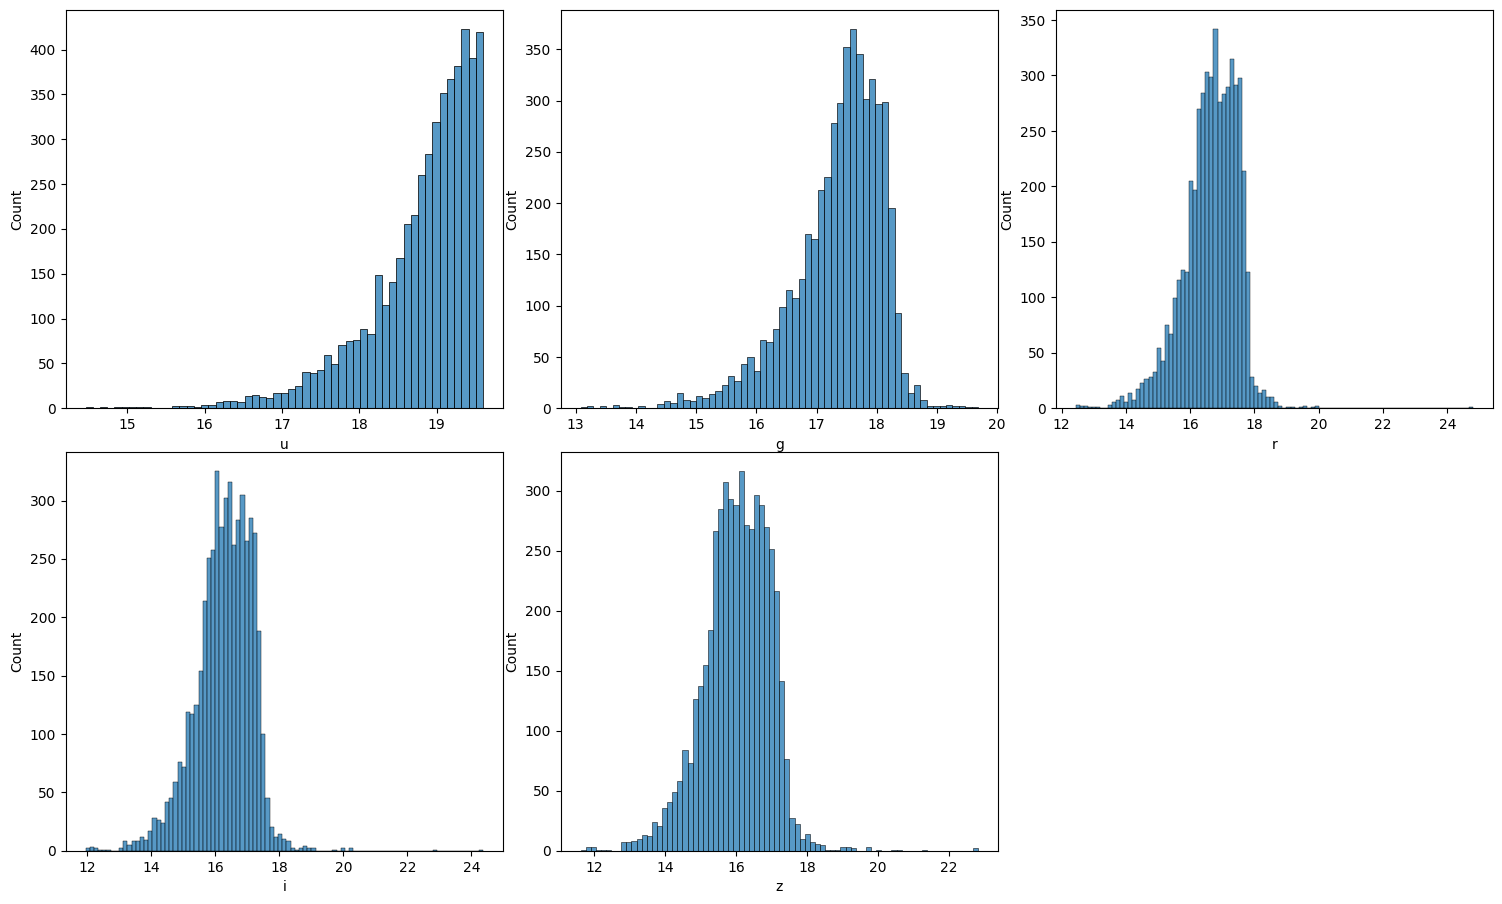

In [156]:
#Galaxy
data = gal
fig, ax = plt.subplots(nrows=2, ncols=3)
ax[1][2].set_visible(False)
fig.set_size_inches(15,9)
fig.tight_layout()

print('Galaxies')

sns.histplot(data.u, ax=ax[0][0])
#ax[0][0].set_title('u')

sns.histplot(data.g, ax=ax[0][1])
#ax[0][1].set_title('g')

sns.histplot(data.r, ax=ax[0][2])
#ax[0][2].set_title('r')

sns.histplot(data.i, ax=ax[1][0])
#ax[1][0].set_title('i')

sns.histplot(data.z, ax=ax[1][1]);
#ax[1][1].set_title('z');

Quasors


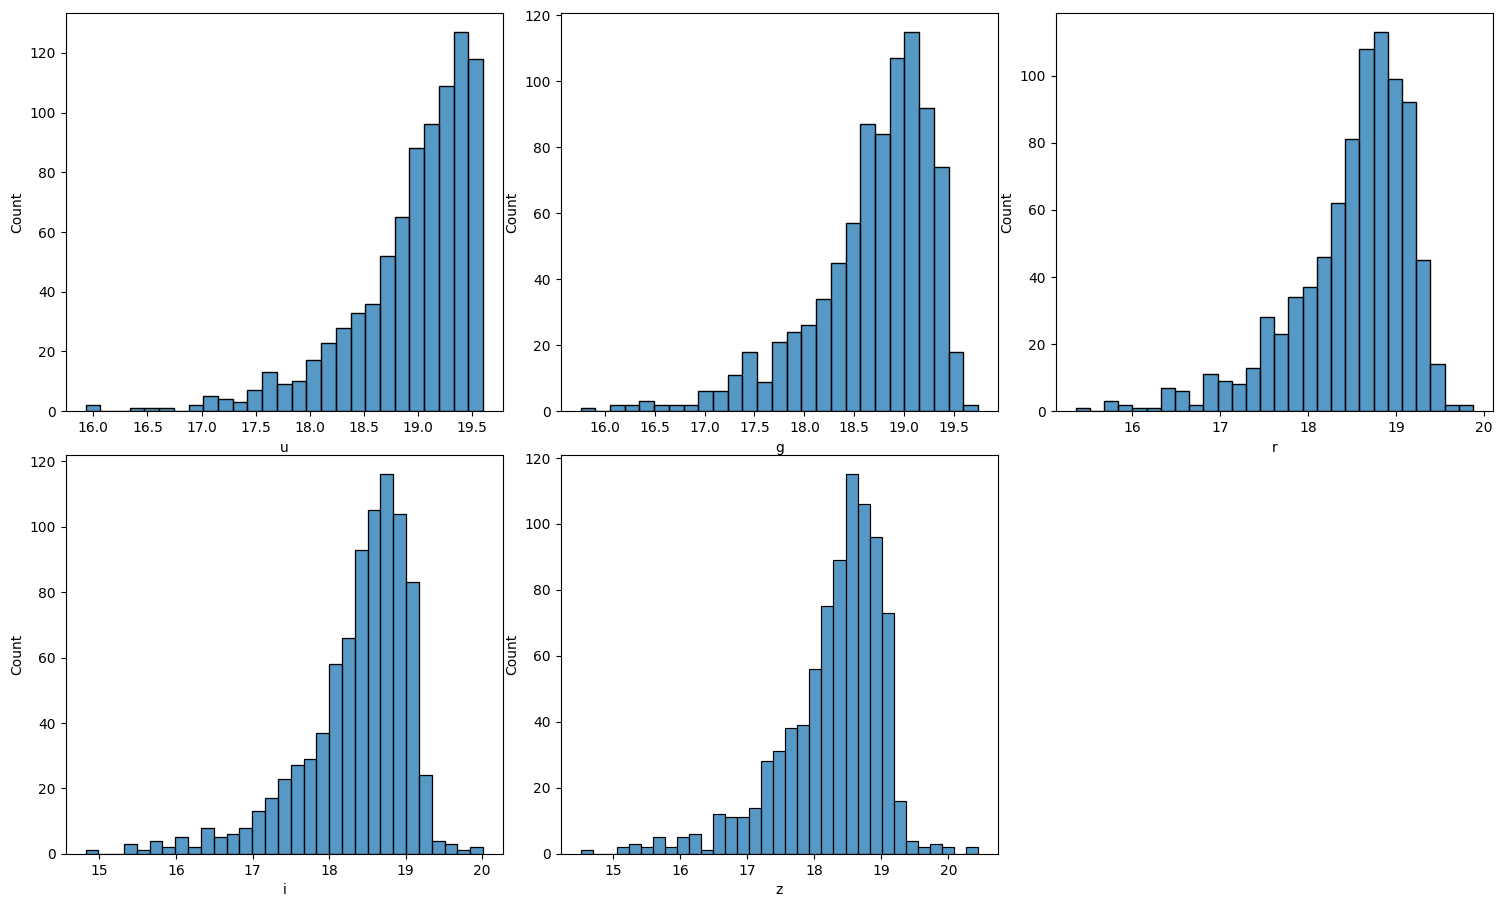

In [155]:
#Quasor
data = qso
fig, ax = plt.subplots(nrows=2, ncols=3)
ax[1][2].set_visible(False)
fig.set_size_inches(15,9)
fig.tight_layout()

print('Quasors')

sns.histplot(data.u, ax=ax[0][0])
#ax[0][0].set_title('u')

sns.histplot(data.g, ax=ax[0][1])
#ax[0][1].set_title('g')

sns.histplot(data.r, ax=ax[0][2])
#ax[0][2].set_title('r')

sns.histplot(data.i, ax=ax[1][0])
#ax[1][0].set_title('i')

sns.histplot(data.z, ax=ax[1][1]);
#ax[1][1].set_title('z');

Stars


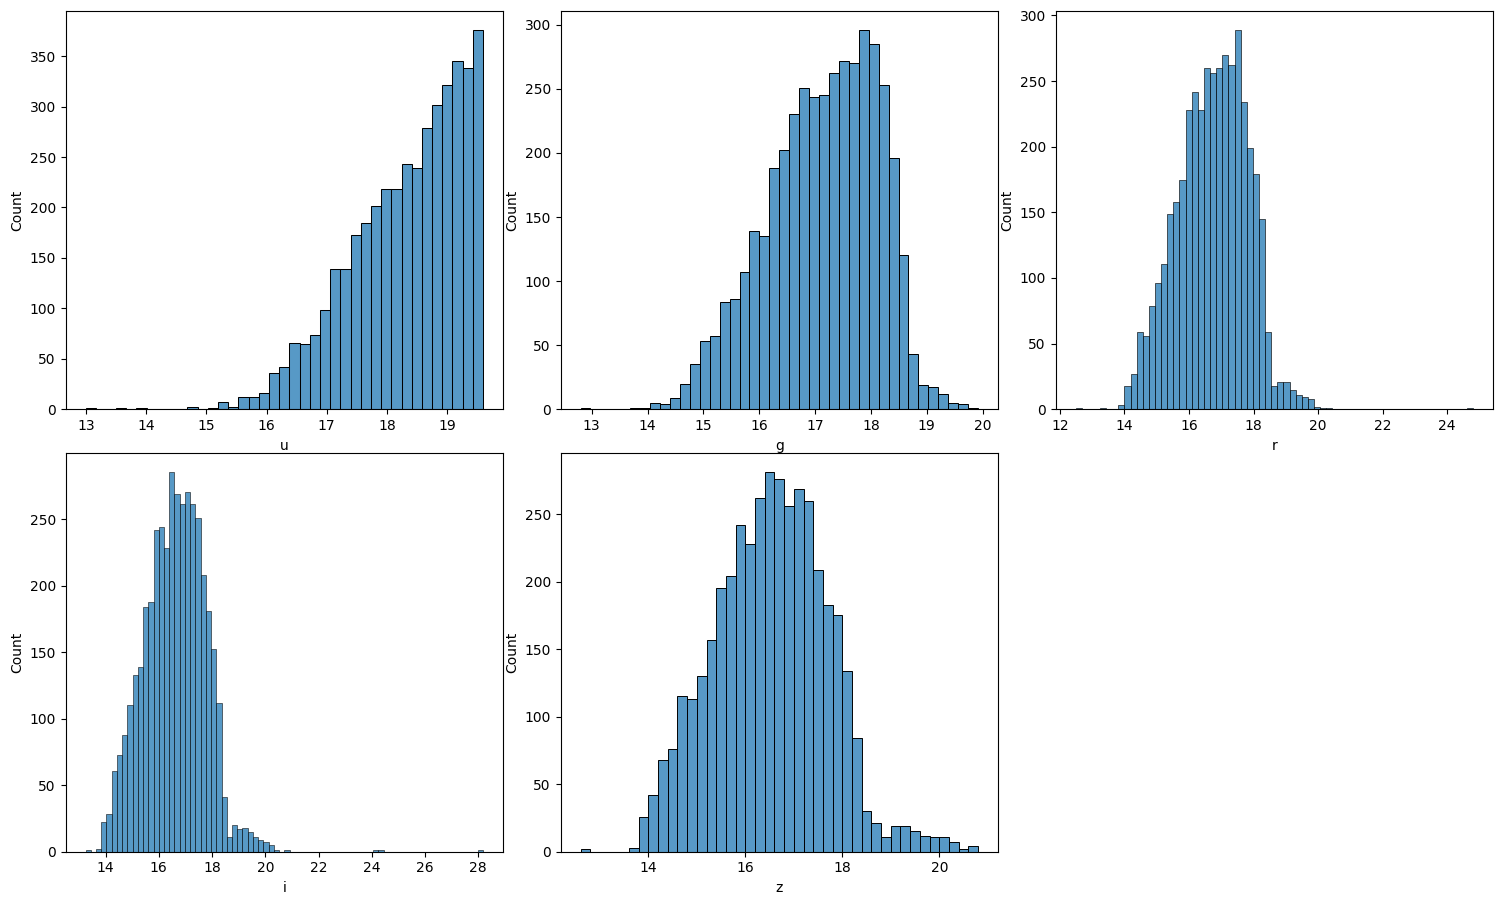

In [154]:
#Star
data = sta
fig, ax = plt.subplots(nrows=2, ncols=3)
ax[1][2].set_visible(False)
fig.set_size_inches(15,9)
fig.tight_layout()

print('Stars')

sns.histplot(data.u, ax=ax[0][0])
#ax[0][0].set_title('u')

sns.histplot(data.g, ax=ax[0][1])
#ax[0][1].set_title('g')

sns.histplot(data.r, ax=ax[0][2])
#ax[0][2].set_title('r')

sns.histplot(data.i, ax=ax[1][0])
#ax[1][0].set_title('i')

sns.histplot(data.z, ax=ax[1][1]);
#ax[1][1].set_title('z');

The wavelengths of light are all expected to be correlated with the objects as the objects are only observable using light -- every object detection will be associated with a positive light value, otherwise no detection would have been made.

#### 1.6

In [167]:
#standardize first
scaler = StandardScaler()
scaled_wl = scaler.fit_transform(df_ready[['u','g','r','i','z']])

#Doing PCA on Wavelength Columns
pca = PCA()
pca.fit(scaled_wl)
print(pca.explained_variance_ratio_)

[0.87521833 0.1152277  0.0050514  0.0033204  0.00118217]


The first two principal components explain >98% of the data's variance, so two is what I will use.

In [177]:
#Doing PCA using 2 components
pca = PCA(n_components=2)
light_pca = pca.fit_transform(scaled_wl)
print(light_pca)

[[-1.06366143 -1.60561903]
 [-0.18155439 -0.07079304]
 [ 1.37596616 -0.5744468 ]
 ...
 [ 1.28273851  0.43980392]
 [ 1.27631619  0.1778554 ]
 [-0.58713734 -1.24176964]]


In [226]:
#creating dataframe with PC axes, and saving separate class label list
true_labels = df_ready.Class
df_final = df_ready.drop(columns=['u','g','r','i','z','Class'])
df_final['PC1'] = light_pca[:,0]
df_final['PC2'] = light_pca[:,1]

### 2

#### 2.1

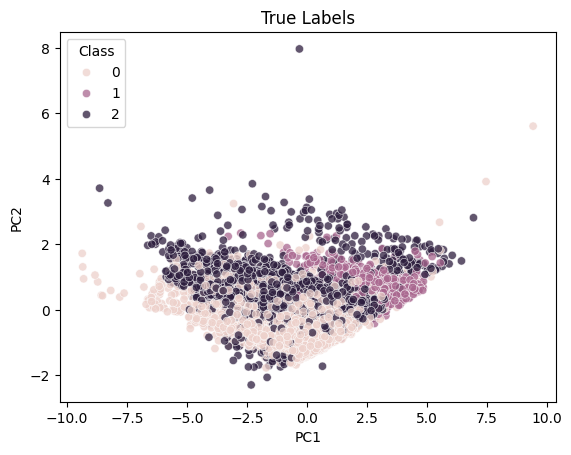

In [214]:
#Just for fun, plot with true label
sns.scatterplot(data = df_final, x=df_final.PC1, y=df_final.PC2, hue=true_labels, alpha=0.75)
plt.title('True Labels')
plt.xlabel('PC1')
plt.ylabel('PC2');

(array([0, 1, 2], dtype=int32), array([6637,  508, 2855]))


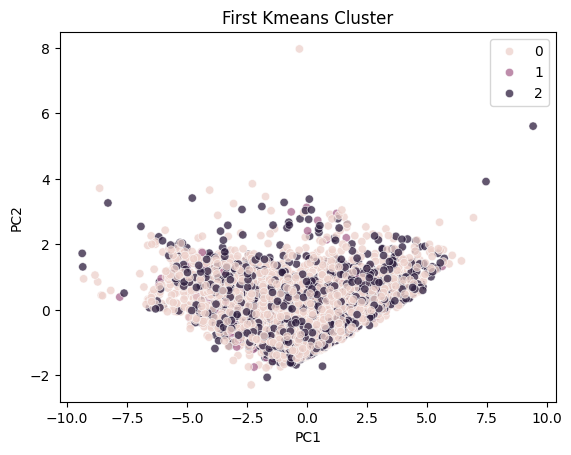

In [210]:
#start with 3 clusters, know there are three categories
kmeans = KMeans(n_clusters=3).fit(df_final)
labels = kmeans.labels_

sns.scatterplot(data = df_final, x=df_final.PC1, y=df_final.PC2, hue=labels, alpha=0.75)
plt.title('First Kmeans Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
print(np.unique(labels, return_counts=True));

(array([0, 1, 2], dtype=int32), array([6634, 2858,  508]))


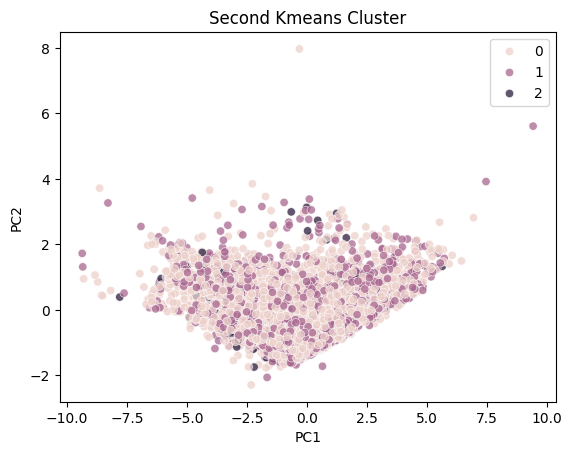

In [213]:
#repeat to check variablility of clusters
kmeans = KMeans(n_clusters=3).fit(df_final)
labels = kmeans.labels_

sns.scatterplot(data = df_final, x=df_final.PC1, y=df_final.PC2, hue=labels, alpha=0.75)
plt.title('Second Kmeans Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
print(np.unique(labels, return_counts=True));

This kmeans clustering is extremely variable, with each iteration looking wildly different.

### 2.2 and 2.3

Use Silhouette Analysis to Find the Ideal Cluster Number and discuss the ideal model's performance

In [238]:
range_n_clusters = [2,3,4,5,6,7,8,9]

#make arrays to store number of clusters and their performances across iterations
ns = []
scores = []

for i in range(20):
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(df_final)
        centers = clusterer.cluster_centers_

        score = silhouette_score(df_final, preds)

        ns.append(n_clusters)
        scores.append(score)

ns = np.array(ns)
scores = np.array(scores)

print('After '+str(i+1)+' Iterations:')
print('')

for n in np.unique(ns):
    print("For n_clusters = {}, silhouette score is {})".format(n, np.mean(scores[ns==n])))


After 20 Iterations:

For n_clusters = 2, silhouette score is 0.5604556043787216)
For n_clusters = 3, silhouette score is 0.5005291294470199)
For n_clusters = 4, silhouette score is 0.5354499026882399)
For n_clusters = 5, silhouette score is 0.5916609186269898)
For n_clusters = 6, silhouette score is 0.5972267461668477)
For n_clusters = 7, silhouette score is 0.6013919265538573)
For n_clusters = 8, silhouette score is 0.5951920180347255)
For n_clusters = 9, silhouette score is 0.5834336555117777)


Now make silhouette plot for ideal cluster number = 7

Average Silhouette Score:0.59


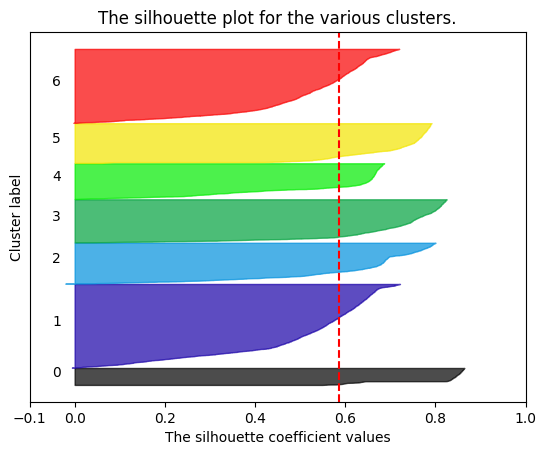

In [244]:
ncluster = 7

clusterer = KMeans(n_clusters=ncluster)
cluster_labels = clusterer.fit_predict(df_final)
silhouette_avg = silhouette_score(df_final, preds)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_final, preds)

fig, ax1 = plt.subplots()
y_lower = 10

for i in range(ncluster):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / ncluster)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

print('Average Silhouette Score:' +str(np.round(silhouette_avg,2)));

This is decent performance, all the clusters have decent silhouette scores but none are particularly strong.

In [249]:
#calculate completeness, homogeneity, and Fowlkes-Mallows

homog = homogeneity_score(true_labels, cluster_labels)
comp = completeness_score(true_labels, cluster_labels)
FM = fowlkes_mallows_score(true_labels, cluster_labels)

print('Homogeneity: '+str(homog))
print('Completeness: '+str(comp))
print('Folkes Mallows: '+str(FM))

Homogeneity: 0.011502939859266821
Completeness: 0.005741202894995276
Folkes Mallows: 0.2770854514339115


##### Homogeneity
Measures whether all assigned cluster labels contain only one ground truth class. A perfect score is 1, representing each assigned cluster only containing points from a single class, the kmeans model here did very poorly.

##### Completeness
Measures whether all points in a given ground truth class are members of the same assigned cluster. This metric again has a perfect score of 1, meaning this kmeans model did extremely badly at completely labeling the data.

##### Folkes-Mallows
Is the geometric mean between precision and recall, and is essentially a combination of homogeneity and completeness. 1 is the perfect Folkes-Mallows score, so again kmeans did a bad job here, but better than when precision and recall are considered separately.

#### Conclusion
Simple k-means clustering is not capable of adequately categorizing this data.

### 3 Machine Learning Models

K-Nearest Neighbors, Naive Bayes, Random Forest, Support Vector Machine, Multi Layer Perceptron

In [271]:
from sklearn.model_selection import train_test_split

# classifiers from sklearns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


#### 3.1

In [404]:
#set up data and true labels again, scale features
X = scaler.fit_transform(df_ready.drop(columns=['Class']))
Y = df_ready['Class']

#same features list
features = df_ready.drop(columns=['Class']).keys().to_numpy()
features

array(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift'], dtype=object)

#### 3.2

In [259]:
#split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#### 3.3

K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1484
           1       0.97      0.90      0.93       244
           2       0.87      0.90      0.89      1272

    accuracy                           0.90      3000
   macro avg       0.92      0.90      0.91      3000
weighted avg       0.90      0.90      0.90      3000



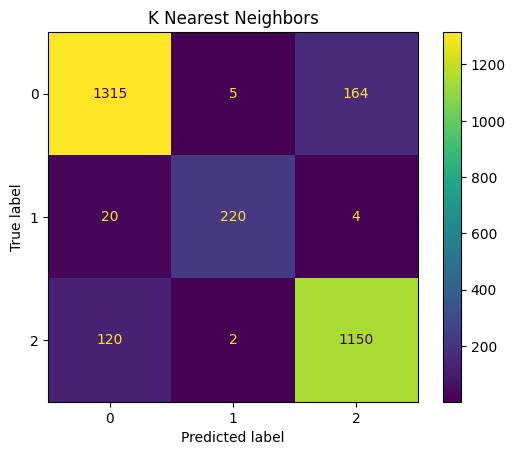

In [356]:
#Model definition
knn = KNeighborsClassifier()

#Training
knn.fit(X_train, Y_train)

#Prediction on Test
Y_pred = knn.predict(X_test)

#Evaluation: classification report, save precision, recall, fscore, and accuracy
print(classification_report(Y_test, Y_pred))
knn_dict = classification_report(Y_test, Y_pred, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()
plt.title('K Nearest Neighbors');

Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1484
           1       0.86      0.93      0.89       244
           2       1.00      0.99      0.99      1272

    accuracy                           0.98      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.98      0.98      0.98      3000



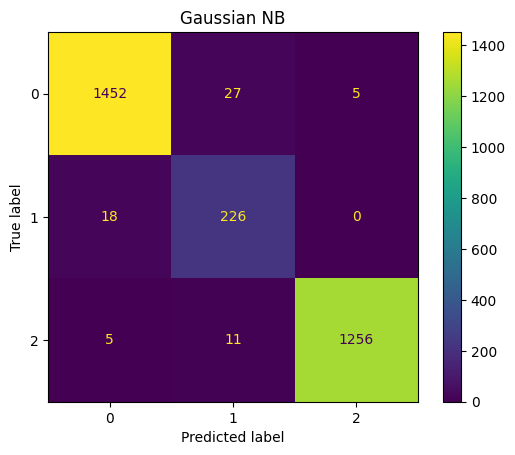

In [357]:
#Model definition
gnb = GaussianNB()

#Training
gnb.fit(X_train, Y_train)

#Prediction on Test
Y_pred = gnb.predict(X_test)

#Evaluation: classification report, save precision, recall, fscore, and accuracy
print(classification_report(Y_test, Y_pred))
gnb_dict = classification_report(Y_test, Y_pred, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()
plt.title('Gaussian NB');

Random Forest

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1484
           1       0.97      0.92      0.95       244
           2       1.00      1.00      1.00      1272

    accuracy                           0.99      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000



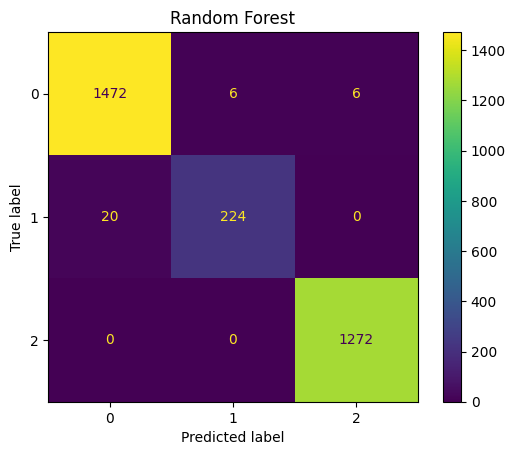

In [359]:
#Model definition
rf = RandomForestClassifier()

#Training
rf.fit(X_train, Y_train)

#Prediction on Test
Y_pred = rf.predict(X_test)

#Evaluation: classification report, save precision, recall, fscore, and accuracy
print(classification_report(Y_test, Y_pred))
rf_dict = classification_report(Y_test, Y_pred, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()
plt.title('Random Forest');

Support Vector Machine

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1484
           1       0.98      0.93      0.95       244
           2       0.94      0.99      0.96      1272

    accuracy                           0.96      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.96      0.96      0.96      3000



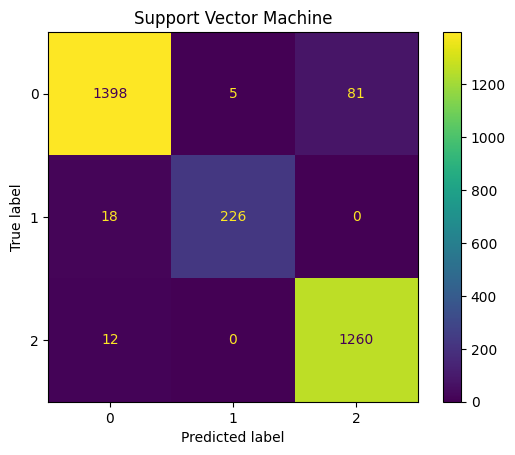

In [380]:
#Model definition
svm = SVC()

#Training
svm.fit(X_train, Y_train)

#Prediction on Test
Y_pred = svm.predict(X_test)

#Evaluation: classification report, save precision, recall, fscore, and accuracy
print(classification_report(Y_test, Y_pred))
svm_dict = classification_report(Y_test, Y_pred, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()
plt.title('Support Vector Machine');

Multilayer Preceptron

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1484
           1       0.99      0.95      0.97       244
           2       0.99      1.00      0.99      1272

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



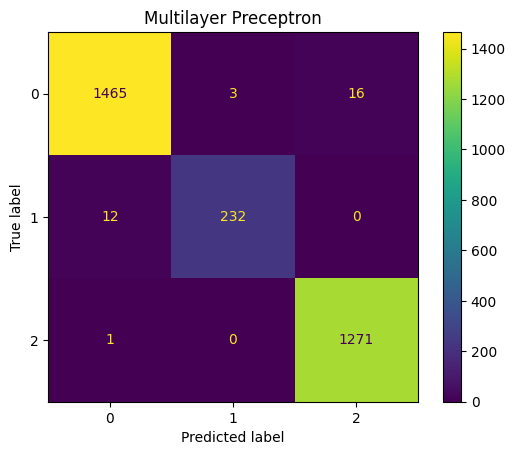

In [385]:
#Model definition
mlp = MLPClassifier(max_iter=400)

#Training
mlp.fit(X_train, Y_train)

#Prediction on Test
Y_pred = mlp.predict(X_test)

#Evaluation: classification report, save precision, recall, fscore, and accuracy
print(classification_report(Y_test, Y_pred))
mlp_dict = classification_report(Y_test, Y_pred, output_dict=True)
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot()
plt.title('Multilayer Preceptron');

#### 3.4 

Confusion matrices were plotted above. Across the board these models perfom much much better than kmeans. Every model had f1 scores in the 0.8 to 1.0 range, but random forest and multilayer preceptron had the highest scores by a significant margin. Between the two, random forest both ran faster and had slightly better scores, making it the preliminary winning model.

Now k-fold validation, with 10 folds

In [386]:
def kfolds(predictor, xdata, ydata, folds, name):
    t1 = time.time()
    results = cross_val_score(predictor, xdata, y=ydata, cv=folds)
    t2 = time.time()
    return(name, np.mean(results), np.std(results), t2-t1)

In [387]:
#computing kfolds for each model and adding to a dataframe
kfolds_df = pd.DataFrame(columns=['model','mean_acc','std_acc','avg_time'])

kfolds_df.loc[len(kfolds_df)] = kfolds(knn, X_train, Y_train, 10, 'knn')
kfolds_df.loc[len(kfolds_df)] = kfolds(gnb, X_train, Y_train, 10, 'gnb')
kfolds_df.loc[len(kfolds_df)] = kfolds(rf, X_train, Y_train, 10, 'rf')
kfolds_df.loc[len(kfolds_df)] = kfolds(svm, X_train, Y_train, 10, 'svm')
kfolds_df.loc[len(kfolds_df)] = kfolds(mlp, X_train, Y_train, 10, 'mlp')

kfolds_df

,model,mean_acc,std_acc,avg_time
0,knn,0.896857,0.009472,0.130295
1,gnb,0.979857,0.004714,0.010908
2,rf,0.988571,0.004238,4.951702
3,svm,0.958286,0.005299,2.273917
4,mlp,0.987286,0.004013,15.673241


In [334]:
#assigning name key to dictionaries
knn_dict['name'] = 'knn' ; gnb_dict['name'] = 'gnb'; rf_dict['name'] = 'rf'; svm_dict['name']='svm'; mlp_dict['name']='mlp'

In [354]:
performance_df = pd.DataFrame(columns=['0','1','2','accuracy','macro avg','weighted avg', 'model'])

dicts = [knn_dict, gnb_dict, rf_dict, svm_dict, mlp_dict]

for d in dicts:
    test = pd.DataFrame(d)
    test['model'] = np.repeat(d['name'], 4)

    performance_df = pd.concat([performance_df, test])  

performance_df.rename(columns={'macro avg':'macro_avg', 'weighted avg':'weighted_avg'}, inplace=True)
performance_df

/var/folders/jz/1_5zh2bj42bb_8hlyhd9lfxw0000gn/T/ipykernel_81135/3652413884.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df = pd.concat([performance_df, test])


,0,1,2,accuracy,macro_avg,weighted_avg,model,name
precision,0.903780,0.969163,0.872534,0.895000,0.915159,0.895850,knn,knn
recall,0.886119,0.901639,0.904088,0.895000,0.897282,0.895000,knn,knn
f1-score,0.894862,0.934183,0.888031,0.895000,0.905692,0.895164,knn,knn
support,1484.000000,244.000000,1272.000000,0.895000,3000.000000,3000.000000,knn,knn
precision,0.984407,0.856061,0.996035,0.978000,0.945501,0.978898,gnb,gnb
recall,0.978437,0.926230,0.987421,0.978000,0.964029,0.978000,gnb,gnb
f1-score,0.981413,0.889764,0.991709,0.978000,0.954295,0.978324,gnb,gnb
support,1484.000000,244.000000,1272.000000,0.978000,3000.000000,3000.000000,gnb,gnb
precision,0.984615,0.973568,0.995305,0.988333,0.984496,0.988249,rf,rf
recall,0.991914,0.905738,1.000000,0.988333,0.965884,0.988333,rf,rf


In [388]:
#reminder of smaller kfolds accuracy df
print(kfolds_df)

  model  mean_acc   std_acc   avg_time
0   knn  0.896857  0.009472   0.130295
1   gnb  0.979857  0.004714   0.010908
2    rf  0.988571  0.004238   4.951702
3   svm  0.958286  0.005299   2.273917
4   mlp  0.987286  0.004013  15.673241


### Winning Model
As predicted earlier, random forest was the most successful model in classifying this data. Multilayer Preceptron had essentially the same score, but took almost 4 times longer to run than random forest, and so is out of the running.

Interestingly, Gaussian Naive Bayesian did very well, ~98%, and was the fastest model by far, running more than two orders of magnitude faster than random forest.

### 4.1

In [390]:
#save feature importance array
importance = rf.feature_importances_

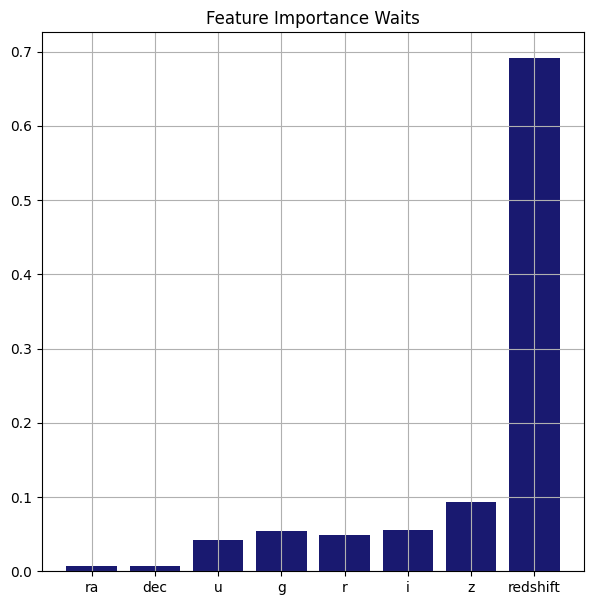

In [420]:
plt.figure(figsize=(7,7))
plt.bar(np.arange(len(importance))+1, importance, color='midnightblue')
plt.xticks(np.arange(len(importance))+1, features)
plt.title('Feature Importance Waits')
plt.grid();

The top three features are redshift, z, and i. As suspected when doing correlation analysis, redshift is far and away the best feature for distinguishing between the classes, accounting for almost 70% of the weight out of the 8 features included.

#### In Conclusion
I found this assignment to be really informative. While I still have some questions/uncertainties about many of these algorithms, I think it was helpful to be walked through an actual example of applying machine learning and getting more familiar with the syntax that it demands. <br><br>
I've also learned how useful the documentation for scikit learn is; I prefer quite a bit more than PyCaret's